In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import itertools
import nltk

In [166]:
df1 = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [167]:
df1['Train/Test'] = 'Train'

In [168]:
df2 = pd.read_csv('testData.tsv', sep='\t')
df2['Train/Test'] = 'Test'

In [169]:
df3 = pd.read_csv('imdb_master.csv',encoding="latin-1")

In [170]:
df3 = df3.drop(['Unnamed: 0','type','file'],axis=1)

In [171]:
df3.columns = ["review","sentiment"]
df3['Train/Test'] = 'Train'

In [172]:
df3['sentiment'].value_counts()

unsup    50000
pos      25000
neg      25000
Name: sentiment, dtype: int64

In [173]:
df3 = df3[df3.sentiment != 'unsup']
df3['sentiment'] = df3['sentiment'].map({'pos': 1, 'neg': 0})

In [174]:
df = df1.append([df2,df3], sort = "True")

In [175]:
df.drop(['id'], axis = 1)

,Train/Test,review,sentiment
0,Train,With all this stuff going down at the moment w...,1.0
1,Train,"\The Classic War of the Worlds\"" by Timothy Hi...",1.0
2,Train,The film starts with a manager (Nicholas Bell)...,0.0
3,Train,It must be assumed that those who praised this...,0.0
4,Train,Superbly trashy and wondrously unpretentious 8...,1.0
5,Train,I dont know why people think this is such a ba...,1.0
6,Train,"This movie could have been very good, but come...",0.0
7,Train,I watched this video at a friend's house. I'm ...,0.0
8,Train,"A friend of mine bought this film for £1, and ...",0.0
9,Train,<br /><br />This movie is full of references. ...,1.0


# Data Cleaning

In [176]:
from nltk.corpus import stopwords 
stopwords_list = set(stopwords.words('english')) # Set works faster than String

In [177]:
def clean_text(text):
    text = BeautifulSoup(text).get_text() # Remove HTML
    text = text.lower() # Lower Case
    text = re.sub('[^A-Za-z]',' ',text,) #Only words no numbers or else punctuation
    text = [i for i in text.split() if i not in stopwords_list] # Remove Stopwords
    return text

In [178]:
df['review_new'] = df.review.apply(lambda x: clean_text(x))

In [179]:
Hash_normal = df.review.apply(lambda x: clean_text(x)) # Calling Clean_Text function
h = [] 
for i in Hash_normal:   
    h.append(i)
Merge_list = list(itertools.chain(*h))   # Merging all the list into 1 

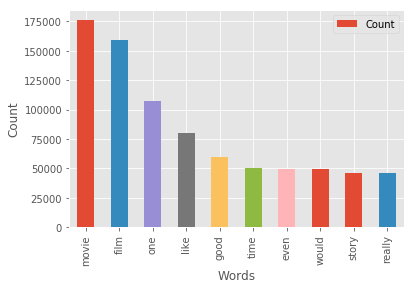

In [180]:
a = nltk.FreqDist(Merge_list) 
data_normal = pd.DataFrame({'Words': list(a.keys()),'Count': list(a.values())}).sort_values(by = ['Count'], ascending = False)
data_normal = data_normal.head(10) # Only look at top 10 words

#Plot Graph
import matplotlib
matplotlib.style.use('ggplot')
data_normal.plot(kind = 'bar', x ='Words', y = 'Count')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [181]:
df['review_new'] = df['review_new'].apply(lambda x: ' '.join(x))
Joinwords = ' '.join(i for i in df['review_new']) 

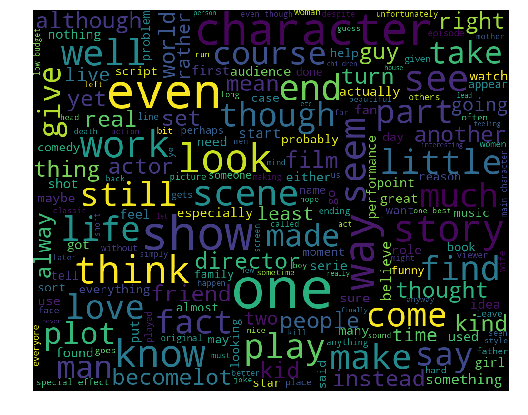

In [182]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000 , height = 800, random_state= 21, max_font_size= 120  ).generate(Joinwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [183]:
df_train = df.loc[df['Train/Test'] == 'Train',:]
df_test = df.loc[df['Train/Test'] == 'Test',:]

## Feature extraction:

In [184]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(analyzer = 'word', max_df = 0.90, min_df =2, max_features = 1000, stop_words = 'english')

bow = bow_vectorizer.fit_transform(df_train['review_new'])
bow.shape

(75000, 1000)

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(analyzer='word',max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tf_idf = tf_idf_vectorizer.fit_transform(df_train['review_new'])
tf_idf.shape

(75000, 1000)

# Model Building

### Using BOW

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_valid, ytrain, yvalid = train_test_split(bow, df_train['sentiment'], random_state=42, test_size=0.3)
model_lg = LogisticRegression()

In [187]:
model_lg.fit(X_train,ytrain)
prediction = model_lg.predict(X_valid)
#prediction = prediction[:,1] >= 0.3  #0.3 means correctly predicting 30% of data
#prediction = prediction.astype(np.int)
print("Logistic Regression f1 score: %s"%f1_score(yvalid, prediction))

Logistic Regression f1 score: 0.8606956367820162


In [188]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators = 100) 

model_forest.fit(X_train,ytrain)
prediction = model_forest.predict(X_valid)
#prediction = prediction[:,1] >= 0.3  #0.3 means correctly predicting 30% of data
#prediction = prediction.astype(np.int)
print("Random Forest Classifier f1 score: %s"%f1_score(yvalid, prediction))

Random Forest Classifier f1 score: 0.9068999375167365


### TF-IDF

In [189]:
xtrain_tfidf = tf_idf[ytrain.index,:]
xvalid_tfidf = tf_idf[yvalid.index,:]

model_lg.fit(xtrain_tfidf,ytrain)
prediction = model_lg.predict(xvalid_tfidf)
#prediction = prediction[:,1] >= 0.3
f1_score(yvalid, prediction)

0.7314867652868619

In [190]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators = 100) 

model_forest.fit(xtrain_tfidf,ytrain)
prediction = model_forest.predict(xvalid_tfidf)
#prediction = prediction[:,1] >= 0.3  #0.3 means correctly predicting 30% of data
#prediction = prediction.astype(np.int)
print("Random Forest Classifier f1 score: %s"%f1_score(yvalid, prediction))

Random Forest Classifier f1 score: 0.6422587651256593
